In [19]:
#importing libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob, os

In [23]:
def extract_label_real(img_path):
    
    """
    The extract_label function is being used to extract the labels about the real fingerprint
    images. These labels include subject ID, gender, Hand and finger.
    
    Variables:
    img_path (str): The path to the image file.
    filename: The name of the image file
    subject_id: it stores the Subject ID
    gender: it stores the gender of the subject
    hand: it stores the about the hand of the subject if it is left or right hand
    finger: it stores the about the finger of the subject if it is index, middle, ring, pinky or thumb

    Returns:
        np.array: it returns uint16 dtype of np array with which stores subject_id, 
                  gender, hand and finger information
    """
    
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == "M" else 1
    lr = 0 if lr == "Left" else 1
    
    if finger == "thumb":
        finger = 0
    elif finger == "index":
        finger = 1
    elif finger == "middle":
        finger = 2
    elif finger  == "ring":
        finger = 3
    elif finger == "little":
        finger = 4
    
    return np.array([subject_id, gender, lr, finger], dtype= np.uint16)

In [24]:
def extract_label_altered(img_path):
    
    """
    The extract_label function is being used to extract the labels about the altered fingerprint
    images. These labels include subject ID, gender, Hand and finger.
    
    Variables:
    img_path (str): The path to the altered image file.
    filename: The name of the image file
    subject_id: it stores the Subject ID
    gender: it stores the gender of the subject
    hand: it stores the about the hand of the subject if it is left or right hand
    finger: it stores the about the finger of the subject if it is index, middle, ring, pinky or thumb

    Returns:
        np.array: it returns uint16 dtype of np array with which stores subject_id, 
                  gender, hand and finger information
    """
    
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == "M" else 1
    lr = 0 if lr == "Left" else 1
    
    if finger == "thumb":
        finger = 0
    elif finger == "index":
        finger = 1
    elif finger == "middle":
        finger = 2
    elif finger  == "ring":
        finger = 3
    elif finger == "little":
        finger = 4
    
    return np.array([subject_id, gender, lr, finger], dtype= np.uint16)

6000


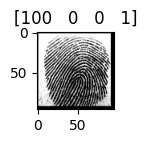

In [25]:
"""
    Real Dataset
    a numpy file is created and saved in the datasets folder which stores the images and labels 
    of the dataset. 
    -The images are first resized to 96x96 and saved as np.uint8. 
    -The labels of the images are extracted using extract_labels_real function and saved as np.uint16
"""


img_list = sorted(glob.glob("C:/Users/omgha/OneDrive/Desktop/Biometric_Dataset/archive/SOCOFing/Real/*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype = np.uint8)
labels = np.empty((len(img_list), 4), dtype= np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # Extracting labels from the filename
    labels[i] = extract_label_real(img_path)

#saving the datasets
np.save('datasets/x_real.npy', imgs)
np.save('datasets/y_real.npy', labels)

plt.figure(figsize=(1,1))
plt.title(labels[0])
plt.imshow(imgs[0], cmap='gray')


11475


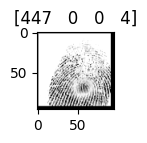

In [26]:
"""
    Altered Easy Dataset
    a numpy file is created and saved in the datasets folder which stores the images and labels 
    of the dataset. 
    -The images are first resized to 96x96 and saved as np.uint8. 
    -The labels of the images are extracted using extract_labels_altered function and saved as np.uint16
"""


img_list = sorted(glob.glob("C:/Users/omgha/OneDrive/Desktop/Biometric_Dataset/archive/SOCOFing/Altered/Altered-Easy/*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype = np.uint8)
labels = np.empty((len(img_list), 4), dtype= np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # Extracting labels from the filename
    labels[i] = extract_label_altered(img_path)

#saving the datasets
np.save('datasets/x_easy.npy', imgs)
np.save('datasets/y_easy.npy', labels)

plt.figure(figsize=(1,1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')


17067


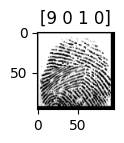

In [27]:
"""
    Altered Easy Dataset
    a numpy file is created and saved in the datasets folder which stores the images and labels 
    of the dataset. 
    -The images are first resized to 96x96 and saved as np.uint8. 
    -The labels of the images are extracted using extract_labels_altered function and saved as np.uint16
"""


img_list = sorted(glob.glob("C:/Users/omgha/OneDrive/Desktop/Biometric_Dataset/archive/SOCOFing/Altered/Altered-Medium/*.BMP"))
print(len(img_list))

imgs = np.empty((len(img_list), 96, 96), dtype = np.uint8)
labels = np.empty((len(img_list), 4), dtype= np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (96, 96))
    imgs[i] = img
    
    # Extracting labels from the filename
    labels[i] = extract_label_altered(img_path)

#saving the datasets
np.save('datasets/x_medium.npy', imgs)
np.save('datasets/y_medium.npy', labels)

plt.figure(figsize=(1,1))
plt.title(labels[-1])
plt.imshow(imgs[-1], cmap='gray')
